In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
resistivity_Pt = 10.6 * 10**(-6) * 10**(-2) #10.6 µΩ cm https://iopscience.iop.org/article/10.1088/1742-6596/100/8/082006/pdf#:~:text=The%20bulk%20resistivity%20of%20Pt,results%20in%20higher%20film%20resistance.
thickness_Pt = 300*10**(-9) #300 nm
restivity_TiN = 25 * 10**(-6) * 10**(-2) #25 µΩ cm https://digitalcommons.njit.edu/cgi/viewcontent.cgi?article=1393&context=theses
thickness_TiN = 10e-6 #10 µm
rho_medium = 1/0.42 #condutivity of grey matter is 0.42 S/m
L_track = 3.5 *0.01 #~3,5cm probe length
W_track = 40 * 10**(-6) #max width that we can take

In [ ]:
# Resistance of the track
R_sheet = resistivity_Pt / thickness_Pt
print("R_sheet = ", R_sheet, "Ohm")
R_track = R_sheet * L_track/W_track + restivity_TiN / thickness_TiN
print("R_track = ", R_track, "Ohm")
R_spread = rho_medium/(4*((40*10**(-6))/2))
print("R_spread = ", R_spread, "Ohm")

R_series = R_track + R_spread
print("R_series = ", R_series, "Ohm")

R_sheet =  0.3533333333333332 Ohm
R_track =  309.1916666666666 Ohm
R_spread =  29761.904761904763 Ohm
R_series =  30071.09642857143 Ohm


In [ ]:
# Neurons size
area = 350# * 10**(-6) µm^2
diameter = np.sqrt(area/np.pi) * 2
print(diameter)
volume = 350 #cm^2

21.11004122822376


In [ ]:
# Neurons distances
density = 5000 #cells/mm^3
empty_vol = 1/density #mm^3
print(empty_vol) #mm^3
distance_sphere = (empty_vol * 3/4 / np.pi)**(1/3)#mm
distance_square = empty_vol**(1/3) #mm
distance_hex = (empty_vol/(2*np.sqrt(2)))**(1/3) #mm
print(distance_sphere, distance_hex, distance_square)

0.0002
0.03627831678597811 0.04135185542000138 0.05848035476425733


In [ ]:
# Electrodes parameters
side_length = 40 * 10**(-4) #40µm = 40 * e-4 cm
GSA = side_length**2 # electrode surface area
print('GSA = ', GSA, 'cm^2')
print('GSA = ', GSA*10**8, 'µm^2')

GSA =  1.6e-05 cm^2
GSA =  1600.0 µm^2


In [ ]:
# Shank size
CA1_length = 0.5e-3 #0.8mm
CA3_length = 2.2e-3 #3mm
shank_width = 1e-3 #1.5mm
electrode_spacing = 10e-6 #10µm
electrode_size = 40e-6 #40µm

# Shank surface area
CA1_area = CA1_length * shank_width
CA3_area = CA3_length * shank_width
print('CA1_area = ', CA1_area, 'mm^2')
print('CA3_area = ', CA3_area, 'mm^2')

# Number of electrodes per shank
n_rows_CA1 = CA1_length / (electrode_spacing + electrode_size)
n_rows_CA3 = CA3_length / (electrode_spacing + electrode_size)
n_cols = shank_width / (electrode_spacing + electrode_size)
n_electrodes_CA1 = n_rows_CA1 * n_cols
n_electrodes_CA3 = n_rows_CA3 * n_cols
print('n_electrodes_CA1 = ', n_electrodes_CA1)
print('n_electrodes_CA3 = ', n_electrodes_CA3)

# Electrode density
electrode_density_CA1 = n_electrodes_CA1 / 100
electrode_density_CA3 = n_electrodes_CA3 / 100
print('electrode_density_CA1 = ', electrode_density_CA1)
print('electrode_density_CA3 = ', electrode_density_CA3)



CA1_area =  5e-07 mm^2
CA3_area =  2.2e-06 mm^2
n_electrodes_CA1 =  200.0
n_electrodes_CA3 =  880.0
electrode_density_CA1 =  2.0
electrode_density_CA3 =  8.8


In [ ]:
# Pulse parameters:
# according to this study: Different effects of monophasic pulses and biphasic pulses applied by a bipolar stimulation electrode in the rat hippocampal CA1 region
# biphasic current pulse cathodic first
width = 200e-6 #200µs
amplitude_max = 1.5e-4 # 150µA (Shannon's limit)
amplitude_min = 1e-10 # 0.1nA (response threshold)
amplitude = 1.5e-5 # 15µA
interphase_dwell = 100e-6 #100µs
Q_inj = (width * amplitude)*10**6 #µC
print('Q_inj :', Q_inj, 'µC')
print('Q_inj :', Q_inj*10**(3), 'nC')
print('log10(Q_inj) :', np.log10(Q_inj))

Q_inj : 0.0030000000000000005 µC
Q_inj : 3.0000000000000004 nC
log10(Q_inj) : -2.5228787452803374


In [ ]:
noise_V = 1.5e-7 + 1e-9 # 151nV
AP_V = 70e-6 # 70µV
signal_noise_ratio = AP_V / noise_V
print('signal_noise_ratio :', signal_noise_ratio)

signal_noise_ratio : 463.57615894039736


In [ ]:
# Charge density
Charge_density = Q_inj/GSA
print('GSA = ', GSA, 'cm^2')
print('Charge density = ', Charge_density, 'µC/cm2') #expressed in µC/cm2
print('log10(Charge density) = ', np.log10(Charge_density)) 

GSA =  1.6e-05 cm^2
Charge density =  187.50000000000003 µC/cm2
log10(Charge density) =  2.2730012720637376


In [ ]:
#Shannon plot for stimulation safety
k = 1.75 

# Check if the charge density is within the Shannon limit
def Within_Shannon_limit(Q, A, k):
    return np.log(Q/A) <= k - np.log(Q)

# Compute Shannon limit given a GSA and a k value
def Shannon_limit(GSA, k):
    return np.sqrt(10**k * GSA)

# Compute the pulse width or amplitude given the other and the charge density
def Shannon_limit_pulse(Q, param):
    return Q*10**(-6)/param

In [ ]:
Within_Shannon_limit(Q_inj, GSA, k) #might be wrong because we consider charge density here and not charge capacity

True

In [ ]:
Q_max = Shannon_limit(GSA, k)
print('Q_max =', Q_max, 'µC')
print('Q_max =', Q_max*10**3, 'nC')

print('maximal charge density =', Q_max/GSA, 'µC/cm2')

Q_max = 0.02999576837329823 µC
Q_max = 29.995768373298233 nC
maximal charge density = 1874.7355233311396 µC/cm2


In [ ]:
# If we have a pulse width of 200 µs, what is the maximum amplitude we can use?
width = 200e-6 # generally between 50e-6 and 4e-3
max_amp = Shannon_limit_pulse(Q_max, width)
print('max_amp =', max_amp*10**3, 'mA')

max_amp = 0.14997884186649113 mA


In [ ]:
# Get eletrode surface area for existing electrodes
def GSA_from_charge_density(charge_density, Q):
    return Q*10**(-3)/charge_density

In [ ]:
# Values for existing electrodes
pulse_width_DBS = 60e-6 #60µs
Qinj_DBS = 135e-9 #200nC
charge_density_DBS = 2.3e-6 #2.3µC/cm2
pulse_width_intracortical = 200e-6 #200µs
Q_inj_intracortical = 4.6e-9 #4.6nC
charge_density_intracortical = 2300e-6 #2300µC/cm2
pulse_width_hearing_cat = 150e-6 #150µs
Q_inj_hearing_cat = 1.5e-9 #1.5nC
charge_density_hearing_cat = 90e-6 #90µC/cm2
pulse_width_intraspinal_cat = 100e-6 #100µs
Q_inj_intraspinal_cat = 9e-9 #9nC
charge_density_intraspinal_cat = 4000e-6 #90µC/cm2

# Get maximum amplitude for existing electrodes
max_amp_DBS = Shannon_limit_pulse(Qinj_DBS, pulse_width_DBS)
GSA_DBS = GSA_from_charge_density(charge_density_DBS, Qinj_DBS)
print(f'max_amp_DBS = {max_amp_DBS*10**6} µA')
print(f'pulse_width_DBS = {pulse_width_DBS*10**6:.2f} µs')
print(f'Qinj_DBS = {Qinj_DBS*10**9:.2f} nC')
print(f'GSA_DBS = {GSA_DBS*10**8:.2f} µm^2')
print('\n')

max_amp_intracortical = Shannon_limit_pulse(Q_inj_intracortical, pulse_width_intracortical)
GSA_intracortical = GSA_from_charge_density(charge_density_intracortical, Q_inj_intracortical)
print(f'max_amp_intracortical = {max_amp_intracortical*10**6} µA')
print(f'pulse_width_intracortical = {pulse_width_intracortical*10**6:.1f} µs')
print(f'Q_inj_intracortical = {Q_inj_intracortical*10**9:.1f} nC')
print(f'GSA_intracortical = {GSA_intracortical*10**8:.1f} µm^2')
print('\n')

max_amp_hearing_cat = Shannon_limit_pulse(Q_inj_hearing_cat, pulse_width_hearing_cat)
GSA_hearing_cat = GSA_from_charge_density(charge_density_hearing_cat, Q_inj_hearing_cat)
print(f'max_amp_hearing_cat = {max_amp_hearing_cat*10**6} µA')
print(f'pulse_width_hearing_cat = {pulse_width_hearing_cat*10**6:.1f} µs')
print(f'Q_inj_hearing_cat = {Q_inj_hearing_cat*10**9:.1f} nC')
print(f'GSA_hearing_cat = {GSA_hearing_cat*10**8:.1f} µm^2')
print('\n')

max_amp_intraspinal_cat = Shannon_limit_pulse(Q_inj_intraspinal_cat, pulse_width_intraspinal_cat)
GSA_intraspinal_cat = GSA_from_charge_density(charge_density_intraspinal_cat, Q_inj_intraspinal_cat)
print(f'max_amp_intraspinal_cat = {max_amp_intraspinal_cat*10**6} µA')
print(f'pulse_width_intraspinal_cat = {pulse_width_intraspinal_cat*10**6:.1f} µs')
print(f'Q_inj_intraspinal_cat = {Q_inj_intraspinal_cat*10**9:.1f} nC')
print(f'GSA_intraspinal_cat = {GSA_intraspinal_cat*10**8:.1f} µm^2')
print('\n')

max_amp_DBS = 0.00225 µA
pulse_width_DBS = 60.00 µs
Qinj_DBS = 135.00 nC
GSA_DBS = 5869.57 µm^2


max_amp_intracortical = 2.2999999999999997e-05 µA
pulse_width_intracortical = 200.0 µs
Q_inj_intracortical = 4.6 nC
GSA_intracortical = 0.2 µm^2


max_amp_hearing_cat = 1e-05 µA
pulse_width_hearing_cat = 150.0 µs
Q_inj_hearing_cat = 1.5 nC
GSA_hearing_cat = 1.7 µm^2


max_amp_intraspinal_cat = 8.999999999999999e-05 µA
pulse_width_intraspinal_cat = 100.0 µs
Q_inj_intraspinal_cat = 9.0 nC
GSA_intraspinal_cat = 0.2 µm^2




In [ ]:
# Test with other values
CIC_theoretical = 100*10**(-6) #maximum value for platinum would be 100 µm/cm2
Qinj_theor = CIC_theoretical * GSA #

In [ ]:
Within_Shannon_limit(Qinj_theor, GSA, k) #considering charge injection capacity

True

## Values taken from paper
Values taken from https://www.sciencedirect.com/science/article/pii/S1389034402000138  

In [ ]:
#for Pt/Ir with TiN coating

ESA = 1000*GSA #reffective surface area due to TiN coating
C_inj = 6.6e-2*ESA #Capacitance : 6.6x10^(-2) F/cm^2 multiplied by our electrode area
R_CT = 3.9*10**3 / ESA #3.9x10^3 Ωcm2

In [ ]:
print('C_inj = ', C_inj, 'F')
print('R_CT = ', R_CT, 'Ohm')

C_inj =  0.001056 F
R_CT =  243750.0 Ohm


In [ ]:
f = np.logspace(-5, 5, 40000)

Z_c = 1/(2j*np.pi*f*C_inj)
Z_interface = Z_c*R_CT/(Z_c+ R_CT)#Capacitance and Faradaic resistance are in 
Z_one_elec = Z_interface + R_series

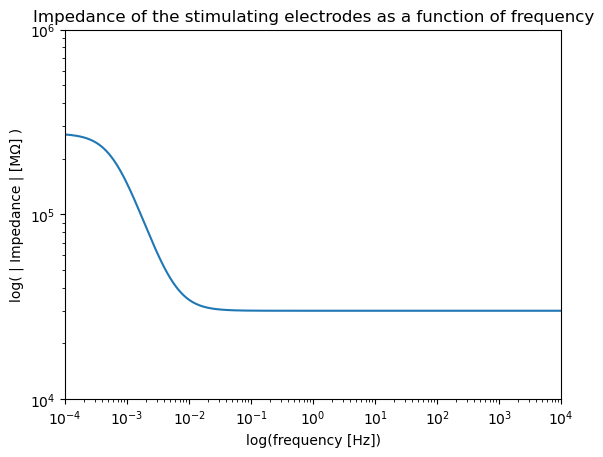

In [ ]:
plt.plot(f, abs(Z_one_elec))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(frequency [Hz])')
plt.title('Impedance of the stimulating electrodes as a function of frequency')
plt.ylabel('log( | Impedance | [MΩ] )')
plt.xlim([1e-4, 1e4])
plt.ylim([1e4, 1e6])
plt.show()

## Values taken from lecture:
double layer capacitance (helmoltz layer)

In [ ]:
#for Pt/Ir with TiN coating

ESA = 1000*GSA #reffective surface area due to TiN coating
C_inj = 20e-6*ESA #Capacitance : 20 µF/cm^2 multiplied by our electrode area
R_CT = None

In [ ]:
f = np.logspace(-5, 4, 40000)

Z_c = 1/(2j*np.pi*f*C_inj)
Z_interface = Z_c #Capacitance 
Z_one_elec = Z_interface + R_series

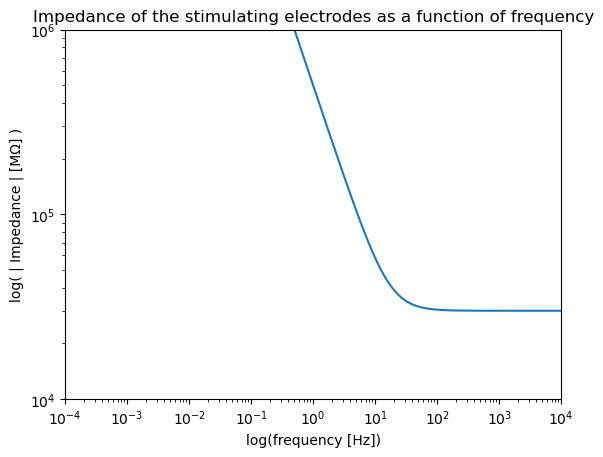

In [ ]:
plt.plot(f, abs(Z_one_elec))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(frequency [Hz])')
plt.title('Impedance of the stimulating electrodes as a function of frequency')
plt.ylabel('log( | Impedance | [MΩ] )')
plt.xlim([1e-4, 1e4])
plt.ylim([1e4, 1e6])
plt.show()

In [ ]:
#IPG supply voltage for 96 channels

V_IPG = 9.5 #9.5 volts

In [ ]:
#define the depth of the CA1/CA3 --> front to back 

nb_electrodes = 64
Z_tot = 1/(nb_electrodes / Z_one_elec)
#total impedance of one electrode --> injection capacitance, resistance of the track, resistance of the medium, faradaic resistance

I_constrained = V_IPG / Z_tot
print("Constrained current = ", I_constrained, " A")

Constrained current =  [7.39115885e-15+1.22245653e-08j 7.39882145e-15+1.22309005e-08j
 7.40649201e-15+1.22372389e-08j ... 2.02186952e-02+3.34752652e-05j
 2.02186953e-02+3.34579265e-05j 2.02186953e-02+3.34405967e-05j]  A
